In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train) , (x_test , y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 334s 2us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

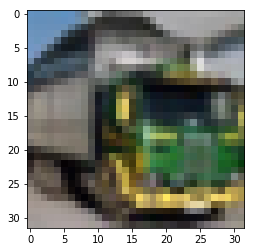

In [10]:
plt.imshow(x_train[14])

In [11]:
x_train.max()

255

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
from keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D( filters = 32 , kernel_size=(4,4) , input_shape=(32,32,3) , activation="relu" ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D( filters = 32 , kernel_size=(4,4) , input_shape=(32,32,3) , activation="relu" ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#128,256,512
model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="relu"))

model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [29]:

model.fit(x_train , y_cat_train , verbose =1 , epochs=2 )

Epoch 1/2
50000/50000 [==============================] - 41s 821us/step - loss: nan - acc: 0.1000
Epoch 2/2
50000/50000 [==============================] - 44s 889us/step - loss: nan - acc: 0.1000


In [30]:
model.metrics_names

['loss', 'acc']

In [31]:
model.evaluate(x_test , y_cat_test)

10000/10000 [==============================] - 2s 233us/step


[nan, 0.1]

In [32]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.10      1.00      0.18      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.00      0.00      0.00      1000
          4       0.00      0.00      0.00      1000
          5       0.00      0.00      0.00      1000
          6       0.00      0.00      0.00      1000
          7       0.00      0.00      0.00      1000
          8       0.00      0.00      0.00      1000
          9       0.00      0.00      0.00      1000

avg / total       0.01      0.10      0.02     10000



In [38]:
from keras.models import load_model
model = load_model("DATA/larger_CIFAR10_model.h5")

In [41]:
model.evaluate(x_test , y_cat_test)

10000/10000 [==============================] - 8s 800us/step


[0.9843295340538025, 0.6902]

In [44]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.61      0.70      1000
          1       0.77      0.88      0.82      1000
          2       0.64      0.57      0.60      1000
          3       0.66      0.30      0.41      1000
          4       0.66      0.67      0.66      1000
          5       0.45      0.81      0.58      1000
          6       0.80      0.75      0.77      1000
          7       0.76      0.69      0.72      1000
          8       0.78      0.81      0.80      1000
          9       0.75      0.82      0.79      1000

avg / total       0.71      0.69      0.69     10000

